In [1]:
import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.shape

(45211, 17)

In [3]:
df.isnull().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [4]:
####
df["pdays"]=df["pdays"].apply(lambda x:"non-contacted" if x==1 else "contacted")

In [5]:
cat_columns = df.dtypes[df.dtypes =='object'].index
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pdays', 'poutcome', 'y'],
      dtype='object')

In [6]:
num_columns = df.dtypes[df.dtypes =='int64'].index
num_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')

## EDA

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

## Univariate Analysis

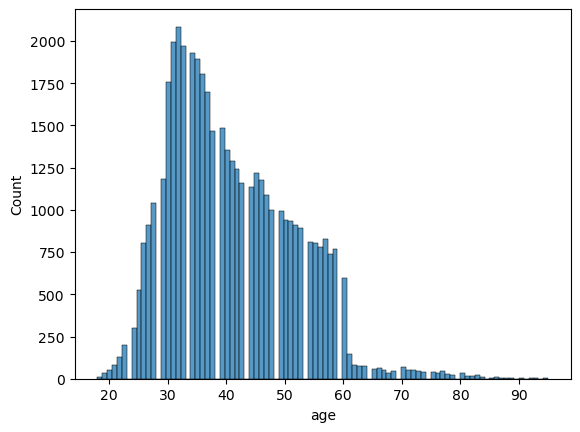

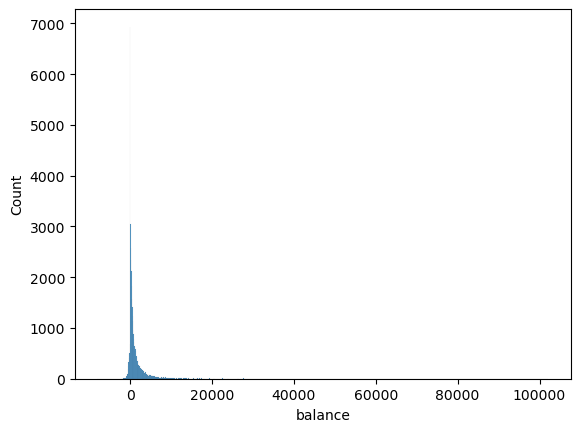

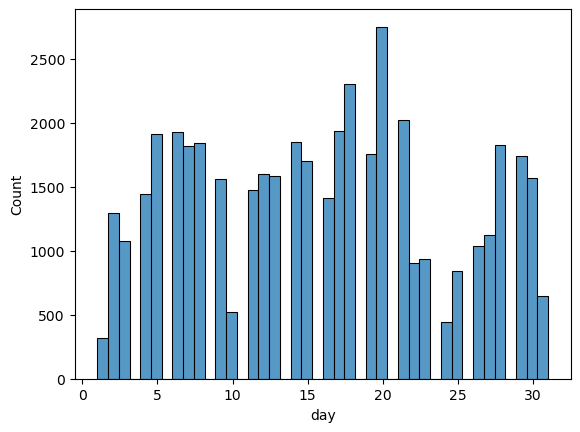

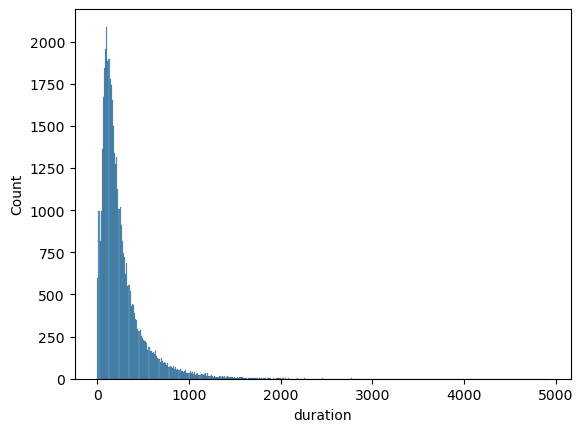

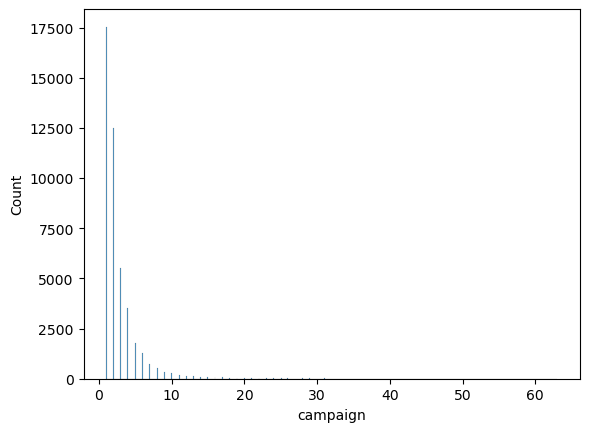

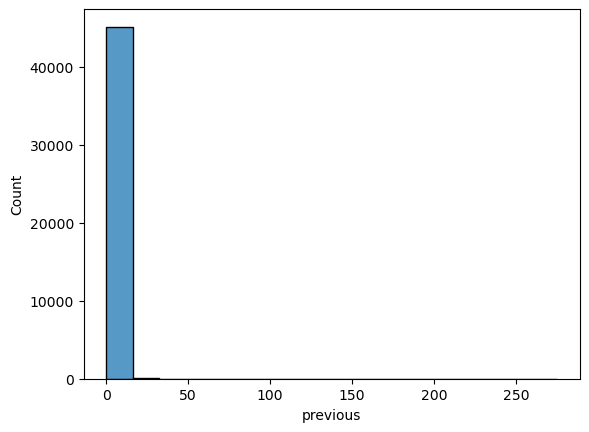

In [8]:
for col in num_columns:
    sns.histplot(x=df[col])
    plt.show()

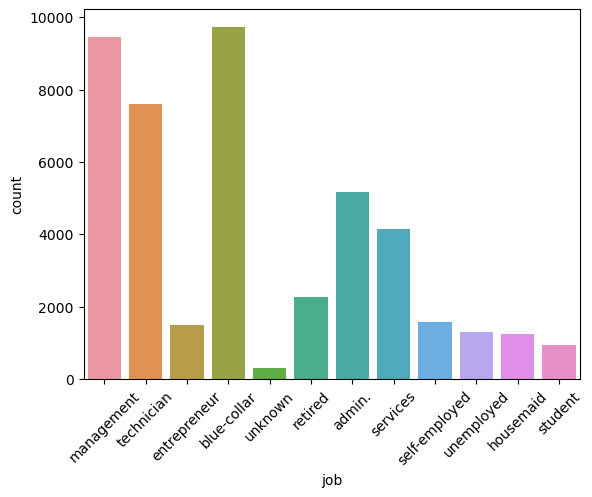

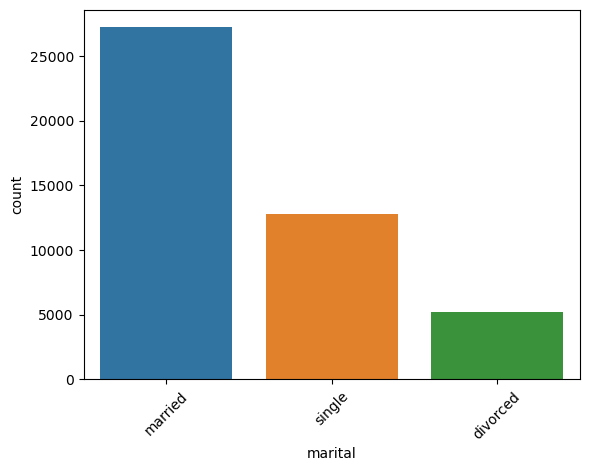

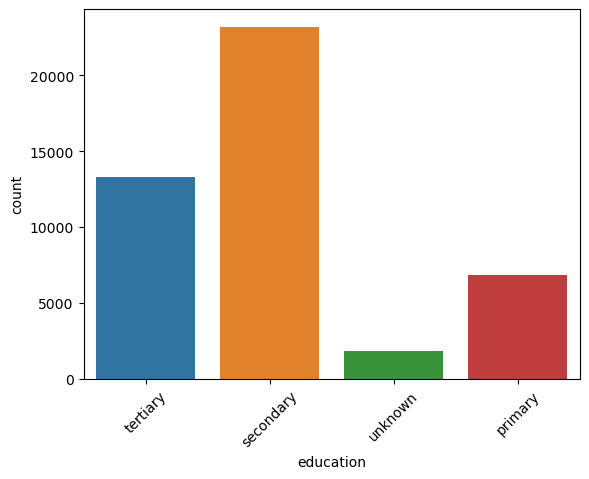

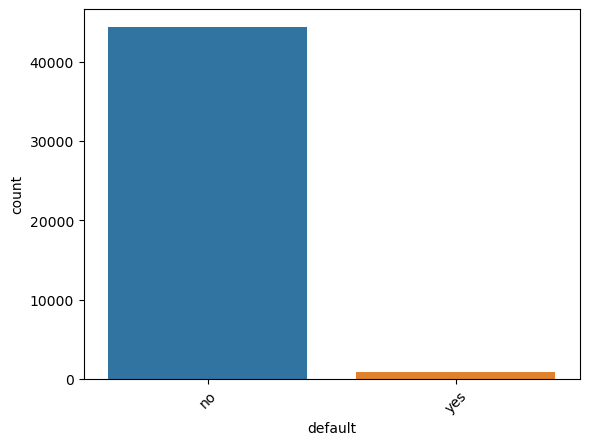

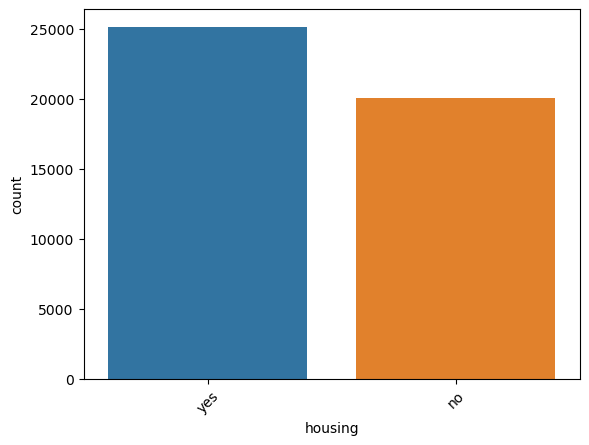

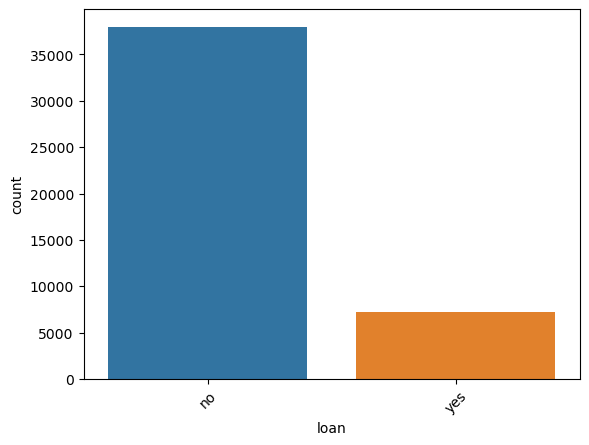

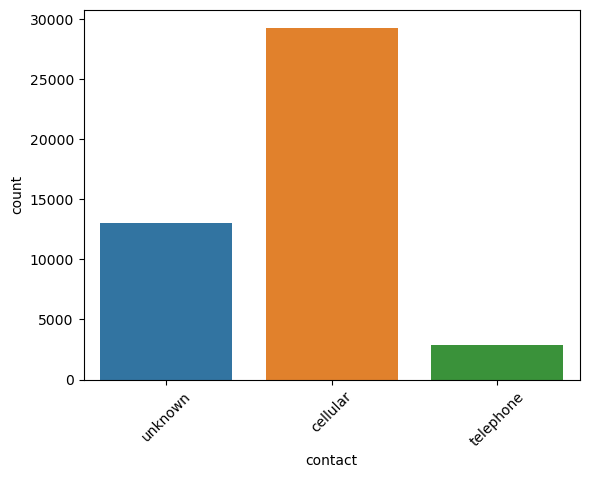

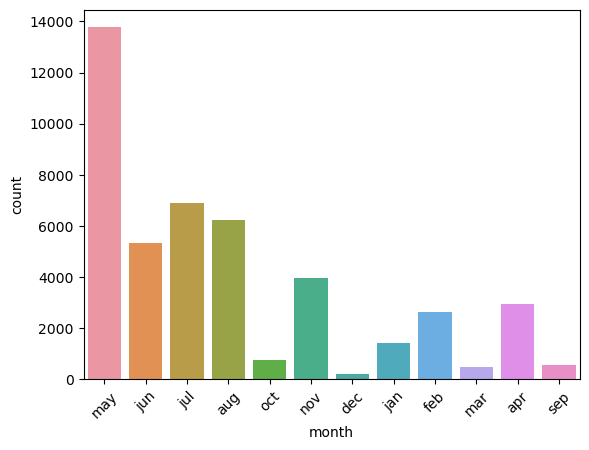

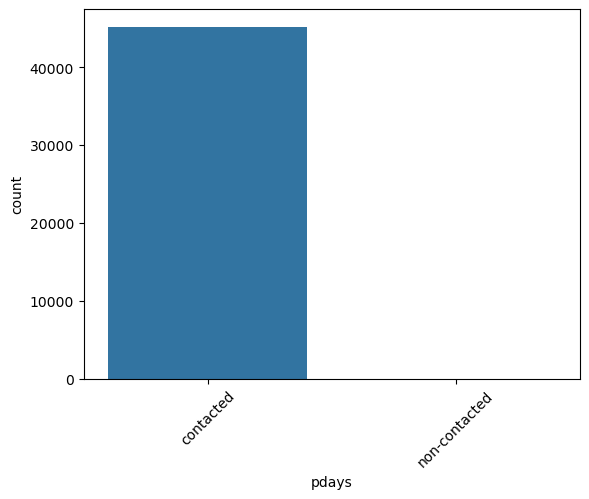

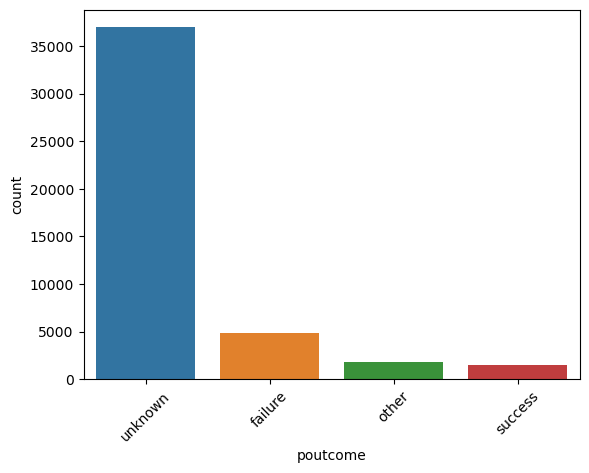

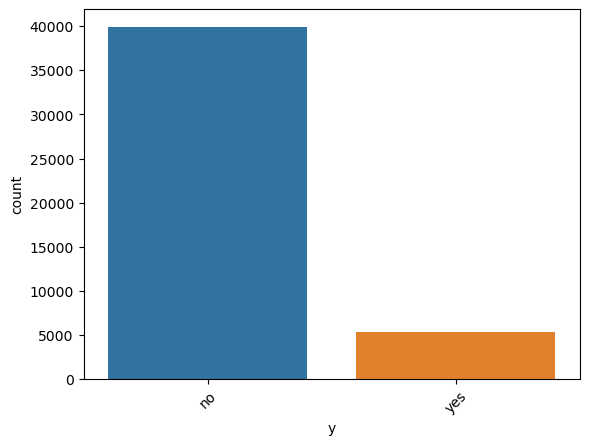

In [9]:
for col in cat_columns:
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis

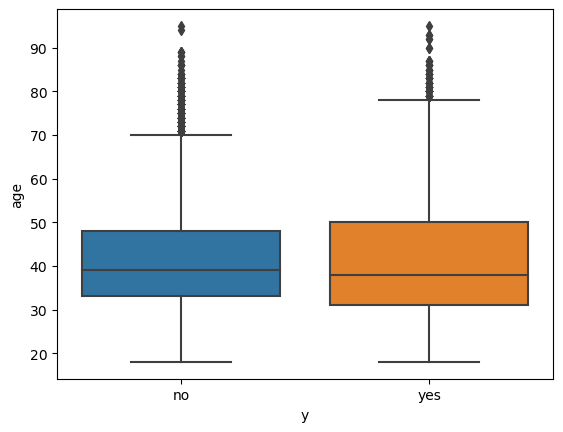

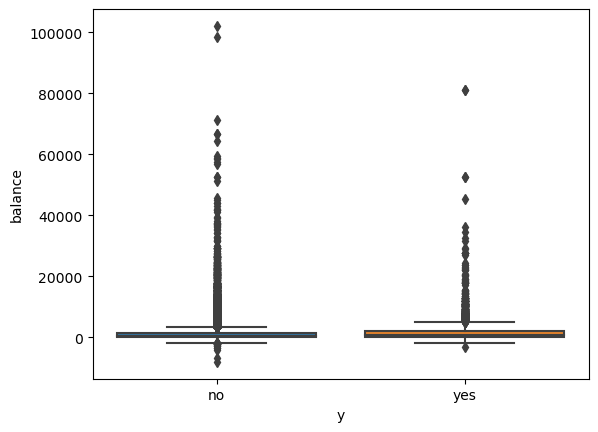

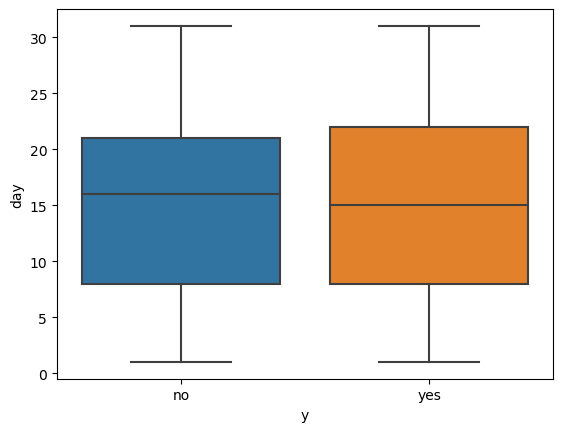

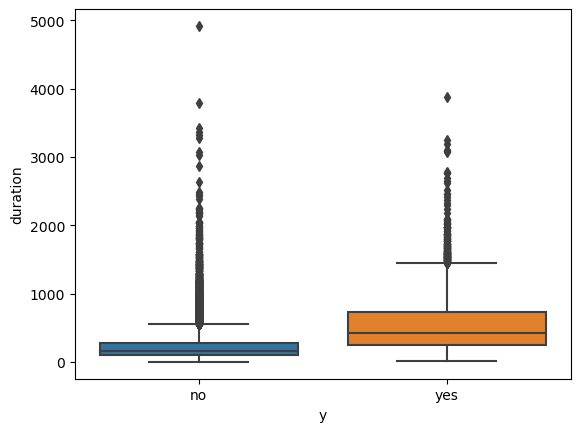

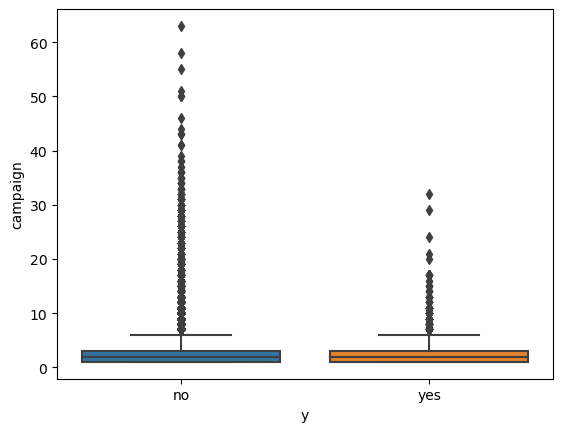

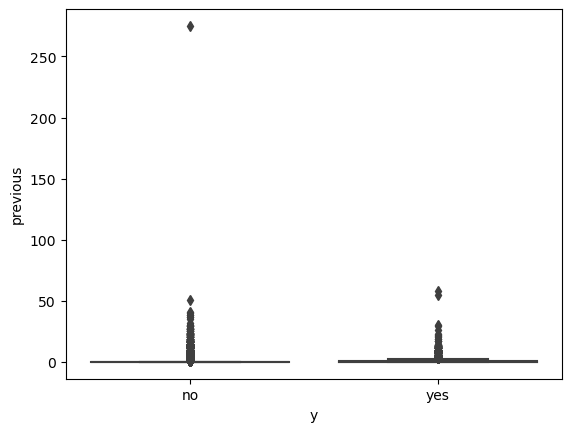

In [10]:
### using boxplot
for col in num_columns:
    sns.boxplot(x=df["y"],y=df[col])
    plt.show()

## Multivariate analysis

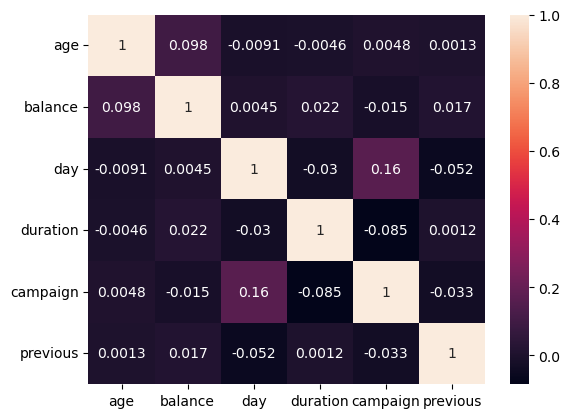

In [11]:
### heatmap
sns.heatmap(df[num_columns].corr(),annot=True)
plt.show()

## Data Preprocessing

### Key Points:
 - Scaling is not mandatory in tree models.
 - Missing Value Imputation is not mandatory in tree models.
 - Outlier Treatment is not mandatory in tree models. 
 - Dummy value creation is no

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,contacted,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,contacted,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,contacted,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,contacted,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,contacted,0,unknown,no


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
## i)label encoder - giving numerical values to categorical columns --> dimensions dont increase (advantage)--> use this in tree 
##ii) we can use dummy varaibale also we used in linear models(dimensions increase) , we cannot have string that should be the objective by these two methods
label_enc_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in label_enc_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
#### our entire data is converted into numerical now
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0


In [16]:
## split
X= df.drop(columns=['y'])
y= df['y']


In [17]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3


In [18]:
## Train-Test split
X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(36168, 16)
(9043, 16)


In [20]:
### Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [21]:
%%time
dt_model.fit(X_train,y_train)

CPU times: total: 828 ms
Wall time: 867 ms


DecisionTreeClassifier()

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# Predictions and accuracy 
y_pred_train = dt_model.predict(X_train) 
y_pred_test = dt_model.predict(X_test) 
train_accuracy = accuracy_score(y_train, y_pred_train) 
test_accuracy= accuracy_score(y_test, y_pred_test) 
print(f'Initial Model Train Accuracy: {train_accuracy}') 
print(f'Initial Model Test Accuracy: {test_accuracy}')

Initial Model Train Accuracy: 1.0
Initial Model Test Accuracy: 0.869844078292602


In [24]:
#!pip install xgboost

In [25]:
from xgboost import XGBClassifier

In [26]:
xgb_model = XGBClassifier()

In [27]:
%%time
xgb_model.fit(X_train,y_train)

CPU times: total: 2.8 s
Wall time: 406 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
## decision tree classifier take less time than xboost but mostly xgboost take less time when we have more data
## but complexity that xgboost is handling is much more 

In [29]:
# Predictions and accuracy 
y_pred_train = xgb_model.predict(X_train) 
y_pred_test = xgb_model.predict(X_test) 
train_accuracy = accuracy_score(y_train, y_pred_train) 
test_accuracy= accuracy_score(y_test, y_pred_test) 
print(f'Initial Model Train Accuracy: {train_accuracy}') 
print(f'Initial Model Test Accuracy: {test_accuracy}')

Initial Model Train Accuracy: 0.9562596770625967
Initial Model Test Accuracy: 0.9047882339931439


In [30]:
## much controlled overfitting model to start with of 
## in decision tree train and test difference was 13-14% while in xgboost it is 5% which is less. without any hyper-parameter